# Part 3: Understanding evaluation metrics for classification
In this section, you will explore different metrics that can be used for classification. For this purpose, we will be studying the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

The goal is to train a classifier to diagnose (predict) diabetes given a set of input features.

You will use the evaluation metrics you implemented to assess the quality of your model.

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# We will be using the metrics that you implemented in part 1
import metrics

As before, let's load the dataset and then do some exploration of the data. You may add further analyses if you consider it necessary.

In [ ]:
# Let's load the dataset
diabetes = pd.read_csv('diabetes.csv', sep=",")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


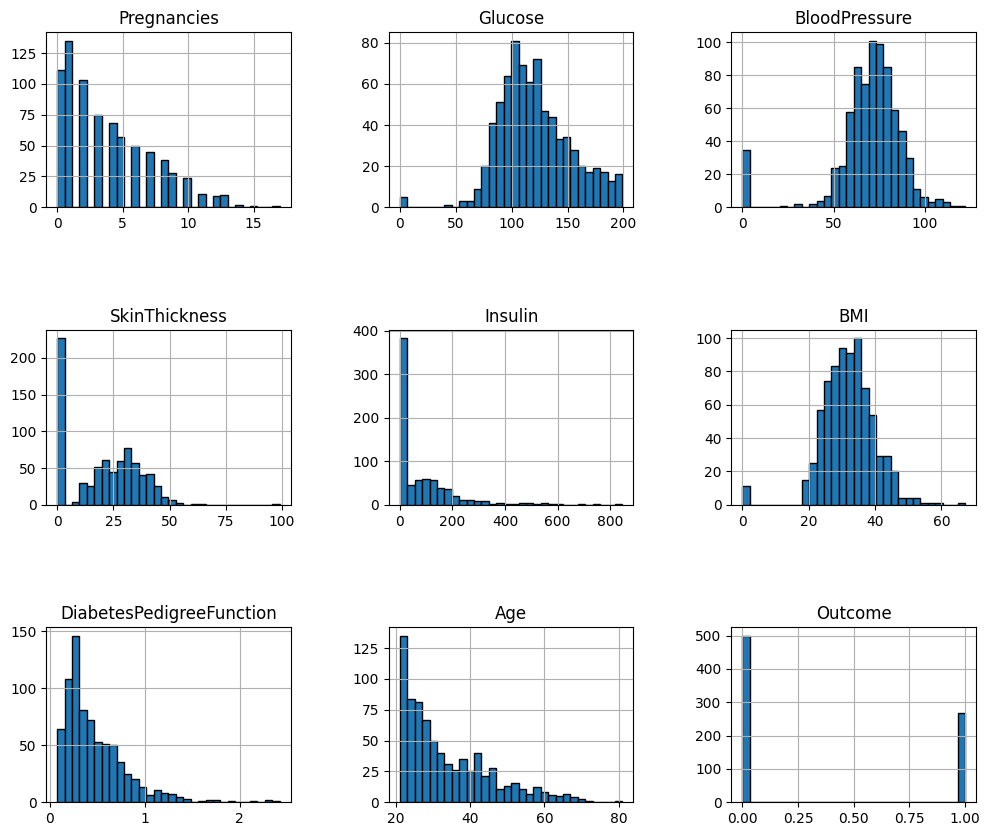

In [ ]:
diabetes.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

**Question**: What can you say about the distribution of the different features?


**Answer**:


**Pregnancies**: The distribution is **right-skewed**, with most values around 0 to 10. It decreases a lot after 2 pregnencies (exponential decreasing).


**Glucose**: This feature shows a sort of **normal distribution** with a peak around 100-150.


**BloodPressure**: The distribution is also **normal**, centered around 60-80, but it has a few zero values, which might indicate missing data.


**SkinThickness**: This feature appears **normal** as well wwith a peak around 30 and with a significant number of zero values, which could represent missing data.


**Insulin**: The distribution is also **normal** with a peak around 100 and with a significant number of zero values, which could represent missing data as well. The distribution also has a long tail, with a few very high values which could represent sick people.


**BMI**: This feature has a **normal distribution**, with a peak around 30. There are some zero values, which could represent missing data.


**DiabetesPedigreeFunction**: This is **right-skewed** and is **exponentialy decreasing**, with most values between 0 and 1, but there are a few higher values extending above 2.


**Age**: The distribution of age is **right-skewed** and is **exponentialy decreasing**, with most values around 20-40, indicating a younger population in the dataset.


**Outcome**: This feature is **binary**, indicating whether a person has diabetes (1) or not (0). The distribution shows that there are more instances of 0 than 1, meaning **more individuals in the dataset do not have diabetes**.





Now, let's move into training a classifier.

As in part 2, we will train a single model without focusing on the task of model selection. In real-life problems, you cannot do this, as you will need to explore different options that can lead to the best model possible (the one that generalizes best).

We create a function fit_and_test that will receive a training set to train a model using linear discriminant analysis (LDA) and a test set for prediction using the previously trained model.

*Note:* Any other classifier could have been used. You are free to test other classifier algorithms already covered in the course.

In [ ]:
def fit_and_test(X_train, y_train, X_test):
    #Create an LDA model
    model = LinearDiscriminantAnalysis()

    # Train the model
    model.fit(X_train, y_train)


    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    return y_pred

Now, let's train and test. As we are not going to do model selection, in this lab we will do one split of the data into training and testing. The training data will not be furthe split into train and validation.

**Remember this should not be done when solving a machine learning problem.**

In [ ]:
# Storing inputs and output into X and y
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We call fit_and_test to first train and then infer new prices for the test set
y_pred = fit_and_test(X_train, y_train, X_test)

### How good is this model?

Use the metrics that you implemented in part one to evaluate the model. Use the cell below for your experiments:

In [ ]:
# YOUR CODE HERE
mse = metrics.mse(y_pred, y_test)
rmse = metrics.rmse(y_pred, y_test)
mae = metrics.mae(y_pred, y_test)
r_score = metrics.r2_score(y_pred, y_test)
accuracy = metrics.accuracy(y_pred, y_test)
precision = metrics.precision(y_pred, y_test)
recall = metrics.recall(y_pred, y_test)
f1_score_metric = metrics.f1_score_metric(y_pred, y_test)

# Print all results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2:", r_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_metric)



Mean Squared Error: 0.0990990990990991
Root Mean Squared Error: 0.3148000938676784
Mean Absolute Error: 0.0990990990990991
R^2: -0.20891089108910932
Accuracy: 0.9009009009009009
Precision: 0.4
Recall: 0.2
F1 Score: 0.26666666666666666


**Question:** Which metrics did you choose? Justify your answer.


**Answer:**


For this classification problem, the following metrics were chosen:


-**Accuracy:** To understand the overall correctness of the model’s predictions.


-**Precision:** To measure how many of the positive predictions were actually correct.


-**Recall:** To understand how well the model identifies actual positive cases (people with diabetes).


-**F1 Score:** To balance precision and recall, especially useful when there’s an imbalance in class distribution.




---




**Question:** Analyze the specific values of the chosen metrics in the context of the problem to understand the model's accuracy. Is it a good or a bad model? Provide a detailed justification of your answer.


**Answer:**


-**Accuracy:** 90.1% shows that the model is mostly correct, but accuracy alone can be misleading in imbalanced datasets, as it doesn’t account for false negatives or positives.


-**Precision:** 0.4 indicates that only 40% of positive predictions are actually correct, which suggests that the model has a high rate of false positives.


-**Recall:** 0.2 indicates that the model correctly identifies only 20% of the actual positive cases, meaning it misses a large portion of people with diabetes, which is critical in a health context.


-**F1 Score:** 0.27 is low, which shows a poor balance between precision and recall.


Overall, this is a quite good model but it could be much better. This is due to low precision, recall, and F1 score, despite high accuracy. The model’s performance in identifying actual positive cases (people with diabetes) is insufficient, which is crucial in a medical setting.




---




**Question:** What is precision telling you about the disease? recall? and F1 score?


**Answer:**


-**Precision:** A precision of 0.4 means that when the model predicts someone has diabetes, it’s correct only 40% of the time. This implies many false positives, potentially leading to unnecessary follow-up tests or treatments.


-**Recall:** A recall of 0.2 means the model only identifies 20% of actual diabetes cases, meaning it misses 80% of people who have the disease. In a medical context, low recall is concerning because it means many diabetic individuals are not being diagnosed, which could lead to untreated health risks.


-**F1 Score:** An F1 score of 0.27 indicates a poor balance between precision and recall, emphasizing that the model struggles to reliably identify diabetes cases while maintaining acceptable correctness in positive predictions. This low score shows the model is ineffective for practical use in diagnosing diabetes.




### Imbalanced data
Now we will repeat the exercise simulating a scenario of highly imbalanced datasets. In healthcare applications, for instance, it is common that there will be a large number of healthy cases and a few pathological ones.

We will simulate this scenario by removing some rows from diabetic patients. Then, we will see how these affect the evaluation metrics.

In [ ]:
# Identify rows with target label 1
target_1_indices = diabetes[diabetes['Outcome'] == 1].index

# Randomly select 80% of the indices
num_to_remove = int(len(target_1_indices) * 0.8)
indices_to_remove = np.random.choice(target_1_indices, num_to_remove, replace=False)

# Remove the selected rows from the DataFrame
diabetes = diabetes.drop(indices_to_remove)


In [ ]:
# Split the data into features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We call fit_and_test to first train and then infer new prices for the test set
y_pred = fit_and_test(X_train, y_train, X_test)

Use the metrics that you implemented in part one to evaluate the model. Use the cell below for your experiments:

In [ ]:
# YOUR CODE HERE
mse = metrics.mse(y_pred, y_test)
rmse = metrics.rmse(y_pred, y_test)
mae = metrics.mae(y_pred, y_test)
r_score = metrics.r2_score(y_pred, y_test)
accuracy = metrics.accuracy(y_pred, y_test)
precision = metrics.precision(y_pred, y_test)
recall = metrics.recall(y_pred, y_test)
f1_score_metric = metrics.f1_score_metric(y_pred, y_test)

# Print all results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2:", r_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_metric)



Mean Squared Error: 0.02912621359223301
Root Mean Squared Error: 0.1706640371965723
Mean Absolute Error: 0.02912621359223301
R^2: -0.03000000000000025
Accuracy: 0.970873786407767
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


**Question:** What can you say about this model?

**Answer:**

-**Accuracy:** 97.1% accuracy, which seems very high, but it is misleading in this context. High accuracy here reflects the model's ability to identify the majority class (non-diabetic cases) rather than both classes.

-**Precision:** 0.0, meaning the model fails to make any correct positive predictions (ie, no cases identified as diabetic are actually diabetic). This indicates a high rate of false negatives.

-**Recall:** 0.0, suggesting that the model does not correctly identify any diabetic cases.

-**F1 Score:** 0.0, a result of both precision and recall being zero, meaning the model completely fails to balance positive identification with correctness.


The high accuracy but zero values for precision, recall, and F1 score reveal that the model is almost entirely biased towards predicting the majority class (healthy individuals), failing to identify any diabetic cases. This is a significant problem in healthcare, where the identification of positive cases (diabetes) is crucial.



---



**Question:** Which metrics provide the most useful information? Investigate and propose a solution

**Answer:**

In this imbalanced scenario:

**Precision, recall, and F1 score** provide the most useful information. They reveal the model's inability to identify diabetic cases, which is not evident from the high accuracy alone.

**Accuracy** is misleading in imbalanced datasets because it only measures overall correctness, without considering class distribution.


**Proposed Solution:**

To address this imbalance, consider the following strategies:

-**Use Resampling Techniques:**

Undersampling the majority class or oversampling the minority class (diabetic cases) can help balance the dataset.

-**Use Class Weights:**

Adjusting class weights in the model can penalize misclassifications of the minority class more heavily, forcing the model to pay more attention to diabetic cases.


